# Projeto 1 - Ciência dos Dados

Nome: Maria Eduarda Torres

Nome: Giancarlo Vanoni Ruggiero

___
Carregando algumas bibliotecas:

In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import re 
import numpy
import itertools
import collections
import functools
import operator
import emoji

In [ ]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Carregando a base de dados com os tweets classificados como relevantes e não relevantes:

In [ ]:
filename = 'iphone_12.xlsx'

In [ ]:
train = pd.read_excel(filename)
train

In [ ]:
test = pd.read_excel(filename, sheet_name = 'Teste')
test

****

___
# <kbd><code style="font-family:Times New Roman;background:black;color:white">Classificador automático de sentimento</code></kbd>



*O produto escolhido foi o "Iphone 12". Foi classificado como relevante todos os tweets que traria algum feedback, tanto positivo como negativo sobre o celular para que a empresa pudesse saber no que melhorar. Os tweets que falavam sobre aposta, sorteio ou comparação com outros produtos que não são concorrentes foram classificados como irrelevantes.*

***

___
# <kbd><code style="font-family:Times New Roman;background:black;color:white">Montando um Classificador Naive-Bayes</code></kbd>





****
> <code style="background:darkblue;color:white">Limpeza de mensagens removendo os caracteres: enter, :, ", ', (, ), etc</code>

In [ ]:
import re 

def cleanup(text):
    """ 
        Função de limpeza muito simples que troca alguns sinais básicos por espaços
    """
    import string
    punctuation = '[!-.:_?;]' # Note que os sinais [] são delimitadores de um conjunto.
    pattern = re.compile(punctuation)
    text_subbed = re.sub(pattern, '', text)
    return text_subbed

def clean_and_replace(list_to_clean):
    lista = []
    for e in list_to_clean:
        c = cleanup(e.lower())
        x = re.sub("@[A-Za-z0-9]+","",c)
        z = re.sub("https//tco/[A-Za-z0-9]+","",x)
        y = z.replace('\n', '').replace('  ', ' ')
        lista.append(y)
    return lista

<mark>*Texto total*</mark>

`lista_T` $\Rightarrow$ lista de tweets já limpos para treinamento 

In [ ]:
lista_T=[] 
lista_T = clean_and_replace(train.Treinamento)

print("O total de tweets para treinamento do classificador é:",len(lista_T))

`texto_total` $\Rightarrow$ *Reunindo todos os tweets em uma única variável de texto, separando cada palavra por um espaço*

In [ ]:
texto_total=""
for e in lista_T:
    texto_total+= " " + e 
texto_total = cleanup(texto_total.lower())

<mark>*Texto relevante*</mark>

`relevante` $\Rightarrow$ *Separando os tweets de Treinamento da categoria Relevante*

In [ ]:
filtra_linhas= train['categorias'] == 1
relevante= train.loc[filtra_linhas, :]

`Lista_T` $\Rightarrow$ *lista de tweets relevantes já limpos para treinamento*

In [ ]:
lista_R=[]    
lista_R = clean_and_replace(relevante.Treinamento)

print('O total de tweets relevantes para treinamento do classificador é:',len(lista_R))

`texto_R` $\Rightarrow$ *Reunindo todos os tweets relevantes em uma única variável de texto, separando cada palavra por um espaço*

In [ ]:
texto_R=""
for e in lista_R:
    texto_R+= " " + e 
texto_R = cleanup(texto_R.lower())

<mark>*Texto irrelevante*</mark>

`irrelevante` $\Rightarrow$ *Separando os tweets de Treinamento da categoria Irrelevante*

In [ ]:
filtra_linhas_2 = train['categorias'] == 0
irrelevante= train.loc[filtra_linhas_2, :]

`Lista_I` $\Rightarrow$ *lista de tweets irrelevantes já limpos para treinamento*

In [ ]:
lista_I=[]    
lista_I = clean_and_replace(irrelevante.Treinamento)

print('O total de tweets irrelevantes para treinamento do classificador é:',len(lista_I))

`texto_R` $\Rightarrow$ *Reunindo todos os tweets irrelevantes em uma única variável de texto, separando cada palavra por um espaço*

In [ ]:
texto_I =""   
for e in lista_I:
    texto_I += " " + e 
texto_I = cleanup(texto_I.lower())

****

****
> <code style="background:darkblue;color:white">Correção de espaços entre palavras e/ou emojis</code>

In [ ]:
def get_emoji_regexp():
    # Sort emoji by length to make sure multi-character emojis are
    # matched first
    emojis = sorted(emoji.EMOJI_DATA, key=len, reverse=True)
    pattern = u'(' + u'|'.join(re.escape(u) for u in emojis) + u')'
    return re.compile(pattern)

`texto` $\Rightarrow$ *texto contendo todas as palavras de treinamento após a correção de espaços*

In [ ]:
texto_split_emoji = get_emoji_regexp().split(texto_total)
texto_split_whitespace = [substr.split() for substr in texto_split_emoji]
texto = functools.reduce(operator.concat, texto_split_whitespace)

`texto_relevante` $\Rightarrow$ *texto contendo apenas as palavras de treinamento do subconjunto relevante após a correção de espaços*

In [ ]:
texto_split_emoji_R = get_emoji_regexp().split(texto_R)
texto_split_whitespace_R = [substr.split() for substr in texto_split_emoji_R ]
texto_relevante = functools.reduce(operator.concat, texto_split_whitespace_R)

`texto_irrelevante` $\Rightarrow$ *texto contendo apenas as palavras de treinamento do subconjunto irrelevante após a correção de espaços*

In [ ]:
texto_split_emoji_I = get_emoji_regexp().split(texto_I)
texto_split_whitespace_I = [substr.split() for substr in texto_split_emoji_I ]
texto_irrelevante = functools.reduce(operator.concat, texto_split_whitespace_I)

***

****
> <code style="background:darkblue;color:white">Suavização de Laplace</code>

<mark>*Cálculo das Probabilidades*</mark>

`prob_relevante` $\Rightarrow$ *Probabilidade do tweet ser relevante*

In [ ]:
prob_relevante = len(lista_R)/len(lista_T)
print("A probabilidade do tweet ser relevante: P(R) =",prob_relevante)

`prob_irrelevante` $\Rightarrow$ *Probabilidade do tweet ser irrelevante*

In [ ]:
prob_irrelevante = len(lista_I)/len(lista_T)
print("A probabilidade do tweet ser irrelevante: P(I) =",prob_irrelevante)

`total_texto_relevante` $\Rightarrow$ *Total de palavras no subconjunto relevante*

In [ ]:
total_texto_relevante = len(texto_relevante)

`total_texto_irrelevante` $\Rightarrow$ *Total de palavras no subconjunto irrelevante*

In [ ]:
total_texto_irrelevante = len(texto_irrelevante)

`vocabulario` $\Rightarrow$ *Permite obter o total de palavras diferentes no vocabulário de treinamento*

In [ ]:
vocabulario = pd.Series(texto).drop_duplicates()

`total_por_palavra_R` $\Rightarrow$ *Contagem das palavras relevantes*

In [ ]:
total_por_palavra_R = pd.Series(texto_relevante).value_counts()

`total_por_palavra_I` $\Rightarrow$ *Contagem das palavras irrelevantes*

In [ ]:
total_por_palavra_I = pd.Series(texto_irrelevante).value_counts()

<mark>*Cálculo das probabilidades das palavras do vocabulário*</mark>

In [ ]:
prob_palavras_R=[]
prob_palavras_I=[]

## Suavização de Laplace: Caso não tenha a palavra no vocabulario
# Probabilidade no conjunto relevante
laplace_R = 1/(total_texto_relevante + len(vocabulario))

#Probabilidade no conjunto irrelevante
laplace_I = 1/(total_texto_irrelevante + len(vocabulario))

#Percorre todo o vocabulario calculando as probabilidades tanto relevante como irrelevante
for palavra in vocabulario:
    if palavra in total_por_palavra_R:
        prob_r = (total_por_palavra_R[palavra] + 1)/(total_texto_relevante + len(vocabulario))
        prob_palavras_R.append(prob_r)
    else:
        prob_palavras_R.append(laplace_R)

    if palavra in total_por_palavra_I:
        prob_i = (total_por_palavra_I[palavra] + 1)/(total_texto_irrelevante + len(vocabulario))
        prob_palavras_I.append(prob_i)
    else:
        prob_palavras_I.append(laplace_I)

<mark>*Organização dos dados: dataframe com as palavras e probabilidades*</mark>

In [ ]:
lista_prob = list(zip(vocabulario,prob_palavras_R,prob_palavras_I))
df_prob_aux = pd.DataFrame(lista_prob, columns = ['Palavra','P(palavra|Relevante)','P(palavra|Irrelevante)'])
df_prob = df_prob_aux.set_index('Palavra')
print(df_prob)

***

# <kbd><code style="font-family:Times New Roman;background:black;color:white">Verificando a performance do Classificador</code></kbd>




****
> <code style="background:darkblue;color:white">Limpeza de mensagens removendo os caracteres da base teste: enter, :, ", ', (, ), etc</code>

`lista_R_teste` $\Rightarrow$ *Limpeza da Lista para Teste de Tweets Relevantes*

In [ ]:
filtra_linhas_teste= test['categorias'] == 1
relevante_teste= test.loc[filtra_linhas_teste, :]
lista_R_teste = []
lista_R_teste = clean_and_replace(relevante_teste.Teste)
print("O total de tweets relevantes usados no teste do classificador é :",len(lista_R_teste))

`lista_I_teste` $\Rightarrow$ *Limpeza da Lista para Teste de Tweets Irrelevantes*

In [ ]:
filtra_linhas_teste_2 = test['categorias'] == 0
irrelevante_teste= test.loc[filtra_linhas_teste_2, :]
lista_I_teste=[]
lista_I_teste = clean_and_replace(irrelevante_teste.Teste)
print("O total de tweets irrelevantes usados no teste do classificador é :",len(lista_I_teste))

***

****
> <code style="background:darkblue;color:white">Correção de espaços entre palavras e/ou emojis da base teste</code>

`lista_R` $\Rightarrow$ *lista de tweets relevantes já limpos para teste*

In [ ]:
lista_R=[] 
for e in lista_R_teste:
    e = e.lower()
    texto_split_emoji_teste = get_emoji_regexp().split(e)
    texto_split_whitespace_teste = [substr.split() for substr in texto_split_emoji_teste]
    list_teste = functools.reduce(operator.concat, texto_split_whitespace_teste)
    lista_R.append(list_teste)

`lista_I` $\Rightarrow$ *lista de tweets irrelevantes já limpos para teste*

In [ ]:
lista_I=[]
for e in lista_I_teste:
    e = e.lower()
    texto_split_emoji_teste = get_emoji_regexp().split(e)
    texto_split_whitespace_teste = [substr.split() for substr in texto_split_emoji_teste]
    list_teste = functools.reduce(operator.concat, texto_split_whitespace_teste)
    lista_I.append(list_teste)

***

****
> <code style="background:darkblue;color:white">Testando cassificador</code>

<mark>*Teste dos tweets relevantes*</mark>

In [ ]:
## Teste dos tweets relevantes
resultado_classificador_R = []
hipotese_melhoria = []

k = 0

#probabilidade da mensagem ser relevante/irrelevante
prob_msg_relevante = 1      
prob_msg_irrelevante = 1

#Contagem de mensagens relevantes/irrelevantes
relevantes_corretas = 0
falso_negativo = 0

while k < len(lista_R):
    for palavra in lista_R[k]:
        #Produto das probabilidades de cada palavra do tweet
        #Caso a palavra faça parte do vocabulário de Treinamento
        try:
            prob_palavra_dado_r = df_prob.loc[palavra]['P(palavra|Relevante)']
            prob_palavra_dado_i = df_prob.loc[palavra]['P(palavra|Irrelevante)']
                
        #Exceção: caso a palavra não conste no vocabulário obtido no Treinamento, deve ter sua prob = 1/(total de palavras + vocabulario)
        except:
            prob_palavra_dado_r = laplace_R
            prob_palavra_dado_i = laplace_I

        prob_msg_relevante = prob_msg_relevante*prob_palavra_dado_r
        prob_msg_irrelevante = prob_msg_irrelevante*prob_palavra_dado_i
        
    #Após as multiplicações das probabilidades das palavras, devemos multiplicar por P(Relevante) e P(Irrelevante)
    prob_msg_relevante = prob_msg_relevante*prob_relevante
    prob_msg_irrelevante = prob_msg_irrelevante*prob_irrelevante
    
    #Classificação: se P(tweet|R).P(R) > P(tweet|I).P(I), então classificamos como Relevante.
    if prob_msg_relevante > prob_msg_irrelevante:
        relevantes_corretas+=1
        resultado_classificador_R.append("Relevante")
    else:
        falso_negativo+=1
        resultado_classificador_R.append("Irrelevante")
    
    hipotese_melhoria.append(prob_msg_relevante/prob_msg_irrelevante)
    
    k+=1
    #Após classificar um tweet, as probabilidades devemos reatribuir 1 para as probabilidades
    prob_msg_relevante = 1
    prob_msg_irrelevante = 1

print("O teste apresentou ", relevantes_corretas, 
      " mensagens relevantes corretamente identificadas e ", falso_negativo, " falso(s) negativo(s)")

<mark>*Teste dos tweets irrelevantes*</mark>

In [33]:
## Teste dos tweets Irrelevantes
resultado_classificador_I = []

k = 0

#probabilidade da mensagem ser relevante/irrelevante
prob_msg_relevante = 1      
prob_msg_irrelevante = 1

#Contagem de mensagens relevantes/irrelevantes
irrelevantes_corretas = 0
falso_positivo = 0

while k < len(lista_I):
    for palavra in lista_I[k]:
        #Produto das probabilidades de cada palavra do tweet
        #Caso a palavra faça parte do vocabulário de Treinamento
        try:
            prob_palavra_dado_r = df_prob.loc[palavra]['P(palavra|Relevante)']
            prob_palavra_dado_i = df_prob.loc[palavra]['P(palavra|Irrelevante)']
                
        #Exceção: caso a palavra não conste no vocabulário obtido no Treinamento, deve ter sua prob = 1/(total de palavras + vocabulario)
        except:
            prob_palavra_dado_r = laplace_R
            prob_palavra_dado_i = laplace_I

        prob_msg_relevante = prob_msg_relevante*prob_palavra_dado_r
        prob_msg_irrelevante = prob_msg_irrelevante*prob_palavra_dado_i
        
    #Após as multiplicações das probabilidades das palavras, devemos multiplicar por P(Relevante) e P(Irrelevante)
    prob_msg_relevante = prob_msg_relevante*prob_relevante
    prob_msg_irrelevante = prob_msg_irrelevante*prob_irrelevante
    
    #Classificação: se P(tweet|R).P(R) > P(tweet|I).P(I), então classificamos como Relevante.
    if prob_msg_relevante > prob_msg_irrelevante:
        falso_positivo+=1
        resultado_classificador_I.append("Relevante")
    else:
        irrelevantes_corretas+=1
        resultado_classificador_I.append("Irrelevante")
    
    hipotese_melhoria.append(prob_msg_relevante/prob_msg_irrelevante)
    
    k+=1
    #Após classificar um tweet, as probabilidades devemos reatribuir 1 para as probabilidades
    prob_msg_relevante = 1
    prob_msg_irrelevante = 1

print("O teste apresentou ", irrelevantes_corretas, 
      " mensagens irrelevantes corretamente identificadas e ", falso_positivo, " falso(s) positivo(s)")

O teste apresentou  52  mensagens irrelevantes corretamente identificadas e  82  falso(s) positivo(s)


<mark>*Cálculo das porcentagens do Classificador*</mark>

In [34]:
total_teste = len(lista_R) + len(lista_I)
porc_positivos_corretos = relevantes_corretas/total_teste
porc_negativos_corretos = irrelevantes_corretas/total_teste
porc_falso_negativo = falso_negativo/total_teste
porc_falso_positivo = falso_positivo/total_teste

print('{:.1%}'.format(porc_positivos_corretos), "de Verdadeiros Positivos")
print('{:.1%}'.format(porc_negativos_corretos), "de Verdadeiros Negativos")
print('{:.1%}'.format(porc_falso_negativo), "de Falsos Negativos")
print('{:.1%}'.format(porc_falso_positivo), "de Falsos Positivos")

31.4% de Verdadeiros Positivos
22.0% de Verdadeiros Negativos
11.9% de Falsos Negativos
34.7% de Falsos Positivos


***

___
# <kbd><code style="font-family:Times New Roman;background:black;color:white">Concluindo</code></kbd>

*Neste artigo, foi feito uma análise de sentimento sobre a opinião do público em geral sobre o iPhone 12. Para obter essas informações, foram coletados tweets que mencionavam o produto e para obter um resultado mais específico, foi seguida a pergunta: Quais recursos poderiam ser melhorados para o lançamento do próximo iPhone?*

*De acordo com o problema, o banco de dados foi dividido em duas categorias: relevante e irrelevante. Os tweets relevantes incluem aqueles com feedback que irão aumentar os pontos fortes e fracos do produto; aqueles que não respondem as perguntas são irrelevantes. Este processo é feito com base em treinamento e teste. Inicia-se a divisão baseando-se na base de treinamento, na qual já tinham as divisões e poderia compilar os cálculos a partir delas, portanto não poderia utilizar o classificador para gerar amostras na base de treinamento, o que afetaria os resultados, pois o valores foram retirados de lá para treinar o programa.*

*O classificador teve uma acurácia de 53,4%, ou seja, a classe que foram colocados os tweets foram iguais a categoria que o programa colocou em 53,4% dos casos.*

*O classificador obteve um desempenho melhor ao classificar mensagens como irrelevante do que como relevante,
sendo que a porcentagem de verdadeiros negativos foi maior do que a de falsos negativos o contrário do que aconteceu
com as mensagens relevantes em que a porcentagem de verdadeiros positivos foi maior que a de falsos positivos*

*Possibilidade de Aperfeiçoamento: De acordo com o texto 'Naive Bayes and Text Classification I', de Sebastian Raschka, incluído nas referências do projeto, poderia remover palavras que são muito frequentes mas não são informativas (chamadas Stop Words e descritas no item 3.2.1 na página 14).*

*Naive Bayes pode ser usado em várias ocasiões, não apenas para classificar tweets, mas também para avaliar a probabilidade de eventos. Um exemplo de aplicação muito comum é identificar se um determinado e-mail é spam ou não. Outro exemplo é uma instituição financeira que usa software de mineração de dados para identificar se seus clientes em potencial estão em risco “baixo”, “médio” ou “alto” para conceder financiamento imobiliário.*

___
# <kbd><code style="font-family:Times New Roman;background:black;color:white"> Qualidade do Classificador a partir de novas separações dos tweets entre Treinamento e Teste</code></kbd>


In [35]:
def embaralhar():
    relacao_colunas = {'Teste':'Treinamento'}
    df_teste_treinamento = pd.concat([train, test.rename(columns=relacao_colunas)])
    df_embaralhado=df_teste_treinamento.sample(frac=1).reset_index(drop=True)
    return df_embaralhado

In [36]:
lista_acertos_relevantes=[]
lista_acertos_irrelevantes=[]

In [37]:
#Essa célula pode levar 3 minutos para carregar
for j in range(100):
    train=embaralhar().iloc[:300,:]
    test=embaralhar().iloc[300:,:]
    
    lista_T=[] 
    lista_T = clean_and_replace(train.Treinamento)
    texto_total=""
    for e in lista_T:
        texto_total+= " " + e 
    texto_total = cleanup(texto_total.lower())
    filtra_linhas= train['categorias'] == 1
    relevante= train.loc[filtra_linhas, :]
    lista_R=[]    
    lista_R = clean_and_replace(relevante.Treinamento)
    texto_R=""
    for e in lista_R:
        texto_R+= " " + e 
    texto_R = cleanup(texto_R.lower())
    filtra_linhas_2 = train['categorias'] == 0
    irrelevante= train.loc[filtra_linhas_2, :]
    lista_I=[]    
    lista_I = clean_and_replace(irrelevante.Treinamento)
    texto_I =""   
    for e in lista_I:
        texto_I += " " + e 
    texto_I = cleanup(texto_I.lower())
    texto_split_emoji = get_emoji_regexp().split(texto_total)
    texto_split_whitespace = [substr.split() for substr in texto_split_emoji]
    texto = functools.reduce(operator.concat, texto_split_whitespace)
    texto_split_emoji_R = get_emoji_regexp().split(texto_R)
    texto_split_whitespace_R = [substr.split() for substr in texto_split_emoji_R ]
    texto_relevante = functools.reduce(operator.concat, texto_split_whitespace_R)
    texto_split_emoji_I = get_emoji_regexp().split(texto_I)
    texto_split_whitespace_I = [substr.split() for substr in texto_split_emoji_I ]
    texto_irrelevante = functools.reduce(operator.concat, texto_split_whitespace_I)
    prob_relevante = len(lista_R)/len(lista_T)
    prob_irrelevante = len(lista_I)/len(lista_T)
    total_texto_relevante = len(texto_relevante)
    total_texto_irrelevante = len(texto_irrelevante)
    vocabulario = pd.Series(texto).drop_duplicates()
    total_por_palavra_R = pd.Series(texto_relevante).value_counts()
    total_por_palavra_I = pd.Series(texto_irrelevante).value_counts()
    prob_palavras_R=[]
    prob_palavras_I=[]

    ## Suavização de Laplace: Caso não tenha a palavra no vocabulario
    # Probabilidade no conjunto relevante
    laplace_R = 1/(total_texto_relevante + len(vocabulario))

    #Probabilidade no conjunto irrelevante
    laplace_I = 1/(total_texto_irrelevante + len(vocabulario))

    #Percorre todo o vocabulario calculando as probabilidades tanto relevante como irrelevante
    for palavra in vocabulario:
        if palavra in total_por_palavra_R:
            prob_r = (total_por_palavra_R[palavra] + 1)/(total_texto_relevante + len(vocabulario))
            prob_palavras_R.append(prob_r)
        else:
            prob_palavras_R.append(laplace_R)

        if palavra in total_por_palavra_I:
            prob_i = (total_por_palavra_I[palavra] + 1)/(total_texto_irrelevante + len(vocabulario))
            prob_palavras_I.append(prob_i)
        else:
            prob_palavras_I.append(laplace_I)
    lista_prob = list(zip(vocabulario,prob_palavras_R,prob_palavras_I))
    df_prob_aux = pd.DataFrame(lista_prob, columns = ['Palavra','P(palavra|Relevante)','P(palavra|Irrelevante)'])
    df_prob = df_prob_aux.set_index('Palavra')
    filtra_linhas_teste= test['categorias'] == 1
    relevante_teste= test.loc[filtra_linhas_teste, :]
    lista_R_teste = []
    lista_R_teste = clean_and_replace(relevante_teste.Treinamento)
    filtra_linhas_teste_2 = test['categorias'] == 0
    irrelevante_teste= test.loc[filtra_linhas_teste_2, :]
    lista_I_teste=[]
    lista_I_teste = clean_and_replace(irrelevante_teste.Treinamento)
    lista_R=[] 
    for e in lista_R_teste:
        e = e.lower()
        texto_split_emoji_teste = get_emoji_regexp().split(e)
        texto_split_whitespace_teste = [substr.split() for substr in texto_split_emoji_teste]
        list_teste = functools.reduce(operator.concat, texto_split_whitespace_teste)
        lista_R.append(list_teste)
    lista_I=[]
    for e in lista_I_teste:
        e = e.lower()
        texto_split_emoji_teste = get_emoji_regexp().split(e)
        texto_split_whitespace_teste = [substr.split() for substr in texto_split_emoji_teste]
        list_teste = functools.reduce(operator.concat, texto_split_whitespace_teste)
        lista_I.append(list_teste)
    
    ## Teste dos tweets relevantes
    resultado_classificador_R = []
    hipotese_melhoria = []
    k = 0

    #probabilidade da mensagem ser relevante/irrelevante
    prob_msg_relevante = 1      
    prob_msg_irrelevante = 1

    #Contagem de mensagens relevantes/irrelevantes
    relevantes_corretas = 0
    falso_negativo = 0

    while k < len(lista_R):
        for palavra in lista_R[k]:
            #Produto das probabilidades de cada palavra do tweet
            #Caso a palavra faça parte do vocabulário de Treinamento
            try:
                prob_palavra_dado_r = df_prob.loc[palavra]['P(palavra|Relevante)']
                prob_palavra_dado_i = df_prob.loc[palavra]['P(palavra|Irrelevante)']

            #Exceção: caso a palavra não conste no vocabulário obtido no Treinamento, deve ter sua prob = 1/(total de palavras + vocabulario)
            except:
                prob_palavra_dado_r = laplace_R
                prob_palavra_dado_i = laplace_I

            prob_msg_relevante = prob_msg_relevante*prob_palavra_dado_r
            prob_msg_irrelevante = prob_msg_irrelevante*prob_palavra_dado_i

        #Após as multiplicações das probabilidades das palavras, devemos multiplicar por P(Relevante) e P(Irrelevante)
        prob_msg_relevante = prob_msg_relevante*prob_relevante
        prob_msg_irrelevante = prob_msg_irrelevante*prob_irrelevante

        #Classificação: se P(tweet|R).P(R) > P(tweet|I).P(I), então classificamos como Relevante.
        if prob_msg_relevante > prob_msg_irrelevante:
            relevantes_corretas+=1
            resultado_classificador_R.append("Relevante")
        else:
            falso_negativo+=1
            resultado_classificador_R.append("Irrelevante")

        hipotese_melhoria.append(prob_msg_relevante/prob_msg_irrelevante)

        k+=1
        #Após classificar um tweet, as probabilidades devemos reatribuir 1 para as probabilidades
        prob_msg_relevante = 1
        prob_msg_irrelevante = 1
    

     ## Teste dos tweets Irrelevantes
    resultado_classificador_I = []

    k = 0

    #probabilidade da mensagem ser relevante/irrelevante
    prob_msg_relevante = 1      
    prob_msg_irrelevante = 1

    #Contagem de mensagens relevantes/irrelevantes
    irrelevantes_corretas = 0
    falso_positivo = 0

    while k < len(lista_I):
        for palavra in lista_I[k]:
            #Produto das probabilidades de cada palavra do tweet
            #Caso a palavra faça parte do vocabulário de Treinamento
            try:
                prob_palavra_dado_r = df_prob.loc[palavra]['P(palavra|Relevante)']
                prob_palavra_dado_i = df_prob.loc[palavra]['P(palavra|Irrelevante)']

            #Exceção: caso a palavra não conste no vocabulário obtido no Treinamento, deve ter sua prob = 1/(total de palavras + vocabulario)
            except:
                prob_palavra_dado_r = laplace_R
                prob_palavra_dado_i = laplace_I

            prob_msg_relevante = prob_msg_relevante*prob_palavra_dado_r
            prob_msg_irrelevante = prob_msg_irrelevante*prob_palavra_dado_i

        #Após as multiplicações das probabilidades das palavras, devemos multiplicar por P(Relevante) e P(Irrelevante)
        prob_msg_relevante = prob_msg_relevante*prob_relevante
        prob_msg_irrelevante = prob_msg_irrelevante*prob_irrelevante

        #Classificação: se P(tweet|R).P(R) > P(tweet|I).P(I), então classificamos como Relevante.
        if prob_msg_relevante > prob_msg_irrelevante:
            falso_positivo+=1
            resultado_classificador_I.append("Relevante")
        else:
            irrelevantes_corretas+=1
            resultado_classificador_I.append("Irrelevante")

        hipotese_melhoria.append(prob_msg_relevante/prob_msg_irrelevante)

        k+=1
        #Após classificar um tweet, as probabilidades devemos reatribuir 1 para as probabilidades
        prob_msg_relevante = 1
        prob_msg_irrelevante = 1
    
    
    total_teste = len(lista_R) + len(lista_I)

    porc_positivos_corretos = relevantes_corretas/total_teste
    porc_negativos_corretos = irrelevantes_corretas/total_teste
    porc_falso_negativo = falso_negativo/total_teste
    porc_falso_positivo = falso_positivo/total_teste
    
    lista_acertos_relevantes.append(porc_positivos_corretos*100)
    lista_acertos_irrelevantes.append(porc_negativos_corretos*100)

    print("______________________________________________________")
    print('{:.1%}'.format(porc_positivos_corretos), "de Verdadeiros Positivos")
    print('{:.1%}'.format(porc_negativos_corretos), "de Verdadeiros Negativos")
    print('{:.1%}'.format(porc_falso_negativo), "de Falsos Negativos")
    print('{:.1%}'.format(porc_falso_positivo), "de Falsos Positivos")
    print("______________________________________________________")

______________________________________________________
41.9% de Verdadeiros Positivos
42.8% de Verdadeiros Negativos
5.5% de Falsos Negativos
9.7% de Falsos Positivos
______________________________________________________
______________________________________________________
44.9% de Verdadeiros Positivos
45.8% de Verdadeiros Negativos
3.4% de Falsos Negativos
5.9% de Falsos Positivos
______________________________________________________
______________________________________________________
44.9% de Verdadeiros Positivos
50.0% de Verdadeiros Negativos
1.3% de Falsos Negativos
3.8% de Falsos Positivos
______________________________________________________
______________________________________________________
41.5% de Verdadeiros Positivos
52.1% de Verdadeiros Negativos
2.1% de Falsos Negativos
4.2% de Falsos Positivos
______________________________________________________
______________________________________________________
45.8% de Verdadeiros Positivos
50.4% de Verdadeiros Negat

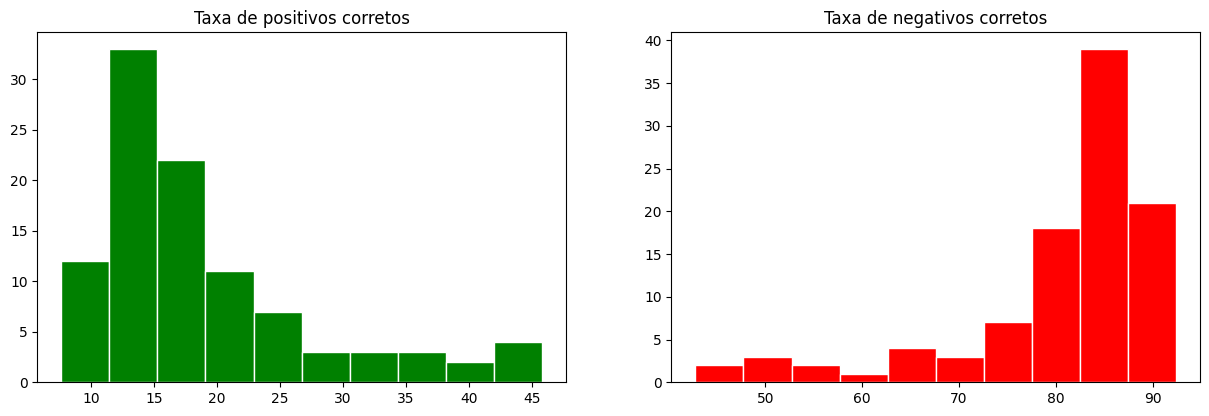

In [38]:
plt.figure(figsize=(15, 10))

plt.subplot(221)
plt.hist(lista_acertos_relevantes, edgecolor='white', color='green')
plt.title('Taxa de positivos corretos')

plt.subplot(222)
plt.hist(lista_acertos_irrelevantes, edgecolor='white', color='red')
plt.title('Taxa de negativos corretos')

plt.show()

___
# <kbd><code style="font-family:Times New Roman;background:black;color:white"> Referências</code></kbd>

[Naive Bayes and Text Classification](https://arxiv.org/pdf/1410.5329.pdf)

[A practical explanation of a Naive Bayes Classifier](https://monkeylearn.com/blog/practical-explanation-naive-bayes-classifier/) 